In [1]:
from helping_functions import get_min_max_values_xy_selected_slices, getting_2D_data_from_h5_filtered_np_xy_switched, dock_array_to_zero, create_single_grid_array, process_data_to_picturelike_structure
from slice_information import slice_numbers
import numpy as np
from PIL import Image
from scipy import ndimage
from scipy.interpolate import griddata
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [3]:
area_limit = 1500
intensity_limit = 1750
#n_grid_x, n_grid_y = 4, 4    # needs to be changed for different segmentation strategy
int_area_switch = 0   # 0 if area is selected; 1 if intensity is selected

if int_area_switch == 0:
    mode = "area"
elif int_area_switch == 1:
    mode = "inte"

In [4]:
ZP_number = 1

In [5]:
# general calculations
h5_path = '/home/jan/Documents/Diplomarbeit/Trainingsdaten/ZPs/ZP{}/ZP_{}_full_part.h5'.format(ZP_number, ZP_number)
part_name = 'ZP{}_combined'.format(ZP_number)
max_slice = slice_numbers.at[ZP_number - 1, 'maxSlice']
min_slice = slice_numbers.at[ZP_number - 1, 'minSlice']
minX, minY, maxX, maxY = get_min_max_values_xy_selected_slices(h5_path, part_name, min_slice_num=min_slice,
                                                               max_slice_num=max_slice, intensity_limit=intensity_limit,
                                                               area_limit=area_limit)
length_x_part = maxX - minX
length_y_part = maxY - minY

min_square = int(0.248 * length_x_part)
# 0.248 and 0.752 -> see book derived from pythagoras and ratio between big and small diameter
max_square = int(0.752 * length_x_part)
# 0.15 and 0.85 are derived from pythagoras and sqrt of 2 when cutting the square out of the circle

In [6]:
num_slice = 600

ZP1 Slice:600


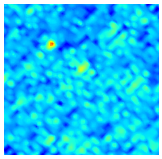

In [11]:
print('ZP{} Slice:{}'.format(ZP_number, num_slice))
slice_name = 'Slice' + str("{:05d}".format(num_slice))
array_filtered_not_docked = getting_2D_data_from_h5_filtered_np_xy_switched(h5_path, part_name,
                                                        slice_name, intensity_limit,area_limit, show_info=False)
array_filtered_docked = dock_array_to_zero(array_filtered_not_docked, minX, minY)

# creating the actual image
figure(num=None, figsize=(5, 5), dpi=40, facecolor='w', edgecolor='k')

x = array_filtered_docked[:, 0]
y = array_filtered_docked[:, 1]
z = array_filtered_docked[:, 2]

xi = np.linspace(min_square, max_square, 100)
yi = np.linspace(min_square, max_square, 100)
zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
cntr1 = plt.contourf(xi, yi, zi, levels=200, cmap="jet")
plt.clim(0, area_limit)
plt.axis('off')
plt.show()

433
1314
873.5
(100, 100)


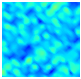

In [81]:
up = min_square + 0.5*(max_square-min_square)
print(min_square)
print(max_square)
print(up)
# creating the actual image
figure(num=None, figsize=(5, 5), dpi=20, facecolor='w', edgecolor='k')

x = array_filtered_docked[:, 0]
y = array_filtered_docked[:, 1]
z = array_filtered_docked[:, 2]

xi = np.linspace(up, max_square, 100)
yi = np.linspace(min_square, up, 100)
zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
print(zi.shape)
cntr1 = plt.contourf(xi, yi, zi, levels=200, cmap="jet")
plt.clim(0, area_limit)
plt.axis('off')
plt.show()

In [82]:
np.linspace(up, max_square, 100)

array([ 873.5       ,  877.94949495,  882.3989899 ,  886.84848485,
        891.2979798 ,  895.74747475,  900.1969697 ,  904.64646465,
        909.0959596 ,  913.54545455,  917.99494949,  922.44444444,
        926.89393939,  931.34343434,  935.79292929,  940.24242424,
        944.69191919,  949.14141414,  953.59090909,  958.04040404,
        962.48989899,  966.93939394,  971.38888889,  975.83838384,
        980.28787879,  984.73737374,  989.18686869,  993.63636364,
        998.08585859, 1002.53535354, 1006.98484848, 1011.43434343,
       1015.88383838, 1020.33333333, 1024.78282828, 1029.23232323,
       1033.68181818, 1038.13131313, 1042.58080808, 1047.03030303,
       1051.47979798, 1055.92929293, 1060.37878788, 1064.82828283,
       1069.27777778, 1073.72727273, 1078.17676768, 1082.62626263,
       1087.07575758, 1091.52525253, 1095.97474747, 1100.42424242,
       1104.87373737, 1109.32323232, 1113.77272727, 1118.22222222,
       1122.67171717, 1127.12121212, 1131.57070707, 1136.02020

In [54]:
import pandas as pd
data = {'num_x': [0,0,1,1],'num_y':[0, 1, 0, 1], 'min_x':[min_square, min_square, up, up], 'max_x':[up, up, max_square, max_square], 'min_y':[up, min_square, up, min_square], 'max_y':[max_square, up, max_square, up]} 
df = pd.DataFrame(data)

In [55]:
df

,num_x,num_y,min_x,max_x,min_y,max_y
case1,0,0,433.0,873.5,873.5,1314.0
case2,0,1,433.0,873.5,433.0,873.5
case3,1,0,873.5,1314.0,873.5,1314.0
case4,1,1,873.5,1314.0,433.0,873.5


In [100]:
max_x = df[(df['num_x']==0) & (df['num_y'] ==1)]['max_x'].to_numpy()[0]

In [101]:
max_x

873.5

In [75]:
for i in range(1,2):
    print(i)

1


In [85]:
xi = np.linspace(1, 3, 100)

In [86]:
xi

array([1.        , 1.02020202, 1.04040404, 1.06060606, 1.08080808,
       1.1010101 , 1.12121212, 1.14141414, 1.16161616, 1.18181818,
       1.2020202 , 1.22222222, 1.24242424, 1.26262626, 1.28282828,
       1.3030303 , 1.32323232, 1.34343434, 1.36363636, 1.38383838,
       1.4040404 , 1.42424242, 1.44444444, 1.46464646, 1.48484848,
       1.50505051, 1.52525253, 1.54545455, 1.56565657, 1.58585859,
       1.60606061, 1.62626263, 1.64646465, 1.66666667, 1.68686869,
       1.70707071, 1.72727273, 1.74747475, 1.76767677, 1.78787879,
       1.80808081, 1.82828283, 1.84848485, 1.86868687, 1.88888889,
       1.90909091, 1.92929293, 1.94949495, 1.96969697, 1.98989899,
       2.01010101, 2.03030303, 2.05050505, 2.07070707, 2.09090909,
       2.11111111, 2.13131313, 2.15151515, 2.17171717, 2.19191919,
       2.21212121, 2.23232323, 2.25252525, 2.27272727, 2.29292929,
       2.31313131, 2.33333333, 2.35353535, 2.37373737, 2.39393939,
       2.41414141, 2.43434343, 2.45454545, 2.47474747, 2.49494